Cell Order to Run  

1. all imports 
2. SAM import 
3. Grounding Dino 
4. read_csv_path 
5. Quad_rejoin 
6. Split Df 
7. bb_setright 
8. get_image_info
9. get_bounding_boxes
10. print(masks)
11. best_bb 
12. Show image (org one) 
13. get_point_coords 
14. point_labels, point_coords = get_point_coords(image) 
15. predictor.set_image(image)  
16. Quad_crop(image, bb) 
17. image = cv.cvtColor(test_quad , cv.COLOR_BGR2RGB) 
18. if masks is not None and len(masks) > 0:


In [1]:
! pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import binascii 
import numpy as np 
import cv2 as cv  
from matplotlib import pyplot as plt


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D 






ModuleNotFoundError: No module named 'tensorflow'

In [1]:
def preprocesing(First_Crop_Set, org_data):
    for i in First_Crop_Set:   
        image = First_Crop_Set.iloc[i]
        bb= bb_pipeline(image, text_prompt="inside of red square", box_threshold=0.5, text_threshold=0.5)
        copped_img = Quad_crop(image, bb) 
        unpaired_quad.append(cropped_img)  
    paried_set= quad_rejoin(unpaired_quad, org_data)  
    # need some where or how to resize the images in the middle here
    return paired_set 


In [4]:
IMG_SIZE = 224
actual_Stand_images = tf.keras.Sequential([
    layers.Resizing(IMG_SIZE, IMG_SIZE, interpolation='bilinear',
    crop_to_aspect_ratio=True),
    layers.Rescaling(1./255)
    ])

NameError: name 'tf' is not defined

In [ ]:
# need to run segment anything and  tf on two different tracks 
# Segment anything track = CSCR_New ,tf track = python
import tensorflow as tf 
from tensorflow import keras  
import tensorflow_datasets as tfds 
import pandas as pd  


import re 
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [6]:
import torch
print(torch.__version__) 
print(torch.cuda.is_available())
print(torch.version.cuda)
print(torch.backends.cudnn.version()) 
from matplotlib import pyplot as plt
import numpy as np 
using_colab = False

2.3.1+cpu
False
None
None


In [35]:
# Note to self: update the pipeline so it includes this too
import os
os.path.abspath("") 
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
import cv2 as cv 

test_quad = cv.imread(r"C:\Users\mcdow\Downloads\image_of_quadrat_site-test2.jpg") 
image = test_quad
type(test_quad)


NoneType

In [3]:
import pandas as pd
import matplotlib   
from PIL import Image 
import numpy as np   
import base64 
import dask




In [4]:
import binascii
rowsize = 6956367872/650
import psutil 
mem =  psutil.virtual_memory() 
(mem.available*0.1)/rowsize

458.0287217104783

In [5]:
import geopandas as gpd  
import pandas as pd 
import dask.dataframe as dd
import dask_geopandas as dgp
import fiona 


def batch_import_gpd(path, layer,chunksize, encoding): 
    holder = []
    #with fiona.env(): 
    with fiona.open(path, layer=layer, encoding=encoding) as src:  
        for feature in src: 
            holder.append(gpd.GeoDataFrame.from_features([feature], crs=src.crs))  
        if len(holder) >= chunksize: 
            yield gpd.GeoDataFrame(pd.concat(holder, ignore_index="True"))  
        if holder: 
            yield  gpd.GeoDataFrame(pd.concat(holder, ignore_index="True"))  
    
    
        
        

In [6]:
#"C:\Users\mcdow\FinialCSCR\DGrass_FGDB\50b34353-1238-4a82-9733-f06a249a6c3d.gdb" 
#"D:\Downloads\DGrass_FGDB\50b34353-1238-4a82-9733-f06a249a6c3d.gdb"
GeoDatabaseDuneGrass= "/home/container/projects/CSCR_Dune_Grass/DATA/50b34353-1238-4a82-9733-f06a249a6c3d.gdb"
columns_0 = ["globalid", "metasite_of_the_day", "EstimatedCoverage"] 
columns_1 = ["REL_GLOBALID","DATA", "EXIFINFO"]  
attachment_table ="survey__ATTACH" 
layer_name = "survey"

gdf_maker = batch_import_gpd(path= GeoDatabaseDuneGrass, layer=layer_name, chunksize=300, encoding= "latin1") 
gdf = dgp.from_geopandas(pd.concat(gdf_maker, ignore_index="True"), chunksize=300) 
gdf = gdf[columns_0]   

attachment_table_maker = batch_import_gpd(path= GeoDatabaseDuneGrass, layer=attachment_table, chunksize=300, encoding= "latin1") 
attached_df = dgp.from_geopandas(pd.concat(attachment_table_maker, ignore_index="True"), chunksize=300 ) 
attached_df= attached_df[columns_1]  

In [7]:
def isin_pandas(df, rel_globalid_values):
    return df[df['globalid'].isin(rel_globalid_values)] 
def get_unique_partition(partition):
    return partition['REL_GLOBALID'].unique()

In [8]:
# filtered list to use to see how two databases match up
attachment_columns = attached_df.columns.difference(['REL_GLOBALID'])
for col in attachment_columns:
    gdf[col] = None
rel_globalid_values = attached_df.map_partitions(get_unique_partition) 
type(rel_globalid_values)

dask_expr._collection.Scalar

In [14]:
#def chunks(dask_series, partions=100):
        #chunk_dask_series = dask_series.repartition(npartitions=partions)
        #for partion in chunk_dask_series.to_delayed(): 
            # Compute and process each chunk based on the chunk_size
            #chunk = partion.compute()
            #yield pd.Series(chunk)  
   # for chunk in chunks(dask_series, partions):
      #  processed_chunks.append(chunk)
def process_in_chuncks(dask_series, npartitions=50): 
    #approx_partition = (dask_series.partitions[0].compute())
    #approx_partition = approx_partition.to_pandas()
    #approx_partition_size = approx_partition.memory_usage(deep=True) 
    #total_size_estimate = first_partition_size * dask_series.npartitions
    #npartitions = npartitions = max(1, int(total_size_estimate / byte_size))
    
    processed_chunks = []
    dask_series_partions = dask_series.repartition(npartitions=npartitions) 
    for partition in dask_series_partions.to_delayed(): 
        chunck = pd.Series(partition.compute()) 
        yield chunck  
    

# Optionally, concatenate all processed chunks back into a single Pandas Series


In [9]:
processed_chunks = (chunk for chunk in  process_in_chuncks(rel_globalid_values))
rel_globalid_values = pd.concat(processed_chunks, ignore_index=True)

NameError: name 'process_in_chuncks' is not defined

In [10]:

rel_globalid_values = pd.Series(list(rel_globalid_values.compute()))


In [10]:
filtered_gdf = gdf.map_partitions(isin_pandas, rel_globalid_values)

# make sure to run with compute
filtered_gdf_pandas = filtered_gdf.compute()
attached_df_pandas = attached_df.compute()
print(type(filtered_gdf_pandas), type(attached_df_pandas) )


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [11]:
filtered_gdf_pandas.head(), attached_df_pandas.head()

(                                 globalid  metasite_of_the_day  \
 0  {83F4F898-0E49-41D6-AEC9-49F1DB47DC95}                  1.0   
 1  {66A2AE20-B5E9-4229-BAF7-20F263C8F12F}                  2.0   
 2  {55339B6C-79A8-498F-BDC3-E1A34EEA2153}                  3.0   
 3  {BF31748D-EF40-4C3B-9C8F-2D6449EFCF0B}                  4.0   
 4  {85C6A74E-064B-4E99-96C4-5F9F06B87203}                  5.0   
 
   EstimatedCoverage  DATA EXIFINFO  
 0             1-25%  None     None  
 1             1-25%  None     None  
 2            26-50%  None     None  
 3            26-50%  None     None  
 4            26-50%  None     None  ,
                              REL_GLOBALID  \
 0  {83F4F898-0E49-41D6-AEC9-49F1DB47DC95}   
 1  {66A2AE20-B5E9-4229-BAF7-20F263C8F12F}   
 2  {55339B6C-79A8-498F-BDC3-E1A34EEA2153}   
 3  {BF31748D-EF40-4C3B-9C8F-2D6449EFCF0B}   
 4  {85C6A74E-064B-4E99-96C4-5F9F06B87203}   
 
                                                 DATA EXIFINFO  
 0  ffd8ffe1052d45786966

In [12]:
def append_attachments(DataFrame_obj, attached_df, attachment_columns): 
    chunksize =160 
    DataFrame_obj = dd.from_pandas(DataFrame_obj, chunksize=chunksize)
    meta = pd.DataFrame({
        'globalid': pd.Series(dtype='object'),
        'metasite_of_the_day': pd.Series(dtype='float64'),
        'EstimatedCoverage': pd.Series(dtype='object'),
        'DATA': pd.Series(dtype='object'),
        'EXIFINFO': pd.Series(dtype='object'),
        'REL_GLOBALID': pd.Series(dtype='string')})
     
     #attached_df = dd.from_pandas(attached_df,chunksize =chunksize)
    def apply_attachments(df,attached_df,attachment_columns):
        for index, row in df.iterrows():
            matching_attachments = attached_df[attached_df['REL_GLOBALID'] == row['globalid']]
            if len(matching_attachments)>0: 
                for col in attachment_columns: 
                    df.at[index, col] = matching_attachments[col].values[0]  
            else: 
                for col in attachment_columns:
                    df.at[index, col] = None 
                
        return df
    
    return DataFrame_obj.map_partitions(apply_attachments, 
                                        attached_df=attached_df, 
                                        attachment_columns=attachment_columns, 
                                        meta=meta)

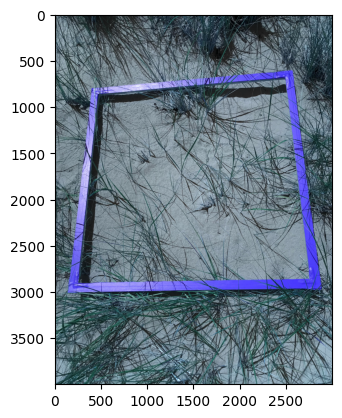

In [13]:

single_image = attached_df_pandas["DATA"].iloc[1] 
single_image = bytes.fromhex(single_image) 
single_image = np.frombuffer(single_image, np.uint8)  
single_image = cv.imdecode(single_image, 1)   
single_image = cv.resize(single_image, (3000, 4000))
plt.imshow(single_image) 
plt.show()


In [ ]:
#single_image = np.asarray(bytearray(single_image), np.uint8)
#print(single_image)

#single_image= np.frombuffer(single_image, np.uint8)
#single_image = single_image.reshape(32,32,3)  
#single_image = cv.cvtColor(single_image, cv.COLOR_BGR2RGB) 
#pyperclip.copy(single_image) 

#image = cv.imdecode(single_image, -1) 


In [14]:


def hex_to_images(DataFrame_obj, col_name, chunksize=5): 
    DataFrame_obj = dd.from_pandas(DataFrame_obj, chunksize=chunksize)
    meta_1 = pd.DataFrame({"REL_GLOBALID":pd.Series(dtype="string"),
                           'EXIFINFO': pd.Series(dtype='object'),  
                           f"image_{col_name}": pd.Series(dtype='object')})
    def nestled_hex_to_images(df,col_name): 
        image_holder = [] 
        for _, row in df.iterrows(): 
            hex_string = row[col_name]
            image = bytes.fromhex(hex_string)
            image= np.frombuffer(image, np.uint8)  
            image = cv.imdecode(image, 1) 
            image = cv.resize(image, (3000, 4000))
            image_holder.append(image)
            image_holder.append({
                "REL_GLOBALID": row['REL_GLOBALID'],
                "EXIFINFO": row['EXIFINFO'],
                f"image_{col_name}": image  # Store the image object in a new column
            })
       
        #if image_holder: 
            #image_holder= pd.DataFrame(image_holder, columns=[f"image_{col_name}"])
            #df= df.drop(columns=[col_name]).reset_index(drop=True) 
            #image_holder = image_holder.reset_index(drop=True)
            #pd.concat([df,image_holder], axis=1)
        return  pd.DataFrame(image_holder)  
    return DataFrame_obj.map_partitions(nestled_hex_to_images, col_name=col_name, meta=meta_1)


In [15]:
attached_df_pandas_1 = hex_to_images(col_name="DATA", DataFrame_obj=attached_df_pandas) 


In [17]:
# uses function to find the real df 

gdf = append_attachments(DataFrame_obj = filtered_gdf_pandas, attached_df= attached_df_pandas_1, attachment_columns= attachment_columns) 
columns2drop = ["globalid", "EXIFINFO"]
df = gdf.drop(columns=columns2drop) 


In [18]:
df.compute()

AttributeError: 'dict' object has no attribute 'dtype'

In [31]:
import pandas as pd 

In [3]:

import os
import sys 
sys.path.append('/path/to/supervision')
import supervision 
sys.path.append(os.path.join(os.getcwd(), "GroundingDINO"))
from groundingdino import config  


#GDINO_CHECKPOINT_PATH = "checkpoints/groundingdino_swint_ogc.pth"  
#GDINO_CONFIG = "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py"



In [4]:
#import sys
#sys.path.append("..") 
Sam_checkpoint = "C:\\Users\\mcdow\\Downloads\\sam_vit_h_4b8939.pth" 
device_1 = "cpu"

sam = sam_model_registry["vit_h"](checkpoint=Sam_checkpoint)  
sam.to(device=device_1) 
predictor = SamPredictor(sam)
GenMasks= SamAutomaticMaskGenerator(sam)
import cv2 as cv  




In [7]:
from groundingdino.util.inference import load_image, load_model, predict 
from groundingdino.config import GroundingDINO_SwinT_OGC as GDINO_CONFIG 
GDINO_CONFIG = "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py"
GDINO_CHECKPOINT_PATH = os.path.abspath(r"C:\Users\mcdow\Downloads\groundingdino_swint_ogc.pth") 
device_1 = torch.device('cpu')

Dino_model = load_model(GDINO_CONFIG, GDINO_CHECKPOINT_PATH)
Dino_model= Dino_model.to(device_1) 



C:\Users\mcdow\anaconda3\envs\CSCR_New\Lib\site-packages\torch\functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3588.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


In [ ]:
# Notes:  
#Pipeline to send the data through: Should I undistort then apply the croping mechenisism? Can 
#I apply as two seperate of the masks? 
# Is there a way to have some form of stopage point in cases it dosen't work? Not sure how I would find out the data was not formating correctly untill 
#after the fact if it worked with some of them and not all of them 
#What is the best way to do the maping, or can I just use the simple approch? I believe the data would be in some kind of CSV format.

# notes: instead of just resize use perspective transform = get them from indexing through the mask  to find cornoners at the end 
# once I have in a list --> convert to some numpy + tensor object 
# See what I can get away with in terms of categores --> might need to pass them as int.'s 
# probably no freezing needed 
#input_dim = tuple/ array three deep ( i.e h,w,d and three color chanals) then that is combined with site 3 and another tuple of categories 

#Sanitey check: somthing similar to loss function I had before + see how much it had changed from before --> if lots of change ma be wrong = remove from dataset 
#Make sure to convert back into the same datatype as the images 
# If need to convert to tf --> tf.cast(), might need to do tf.resize for the given fnction 
#Pipeline --> pass in to undistort first + then make a mask 
# steps to pipeline: 1.undistort (gives me data to do preprocessing),  2.quadcrop (croped iamge), 4.quandrejoin( does rejoin in preprocessing) 
#3. preprocessing(incodeds all the previous steps) 
#Where to join in stand_images = confussed 

#Problems to figure out: what does X mean at the end + what did I have before ---> look through history 
# figure out wich of the three is a problem with the workspace: permisions, DataType, WorkSpce Aviablity
# file name order for the split_apart  
#finish sanitey check
# come up with something to make paired set into tensors + part of it into valadation data 

#C:\Users\mcdow\anaconda3\envs\CSCR_New\Lib\site-packages\torch\functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3588.)
 # return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]

In [8]:
#entery point into neural network
def read_csv_path(DuneGrass_CSV_path):
    uncroped_quad = pd.read_csv(DuneGrass_CSV_path) #  this is one to replace
    uncroped_quad = pd.DataFrame(uncroped_quad)
    return uncroped_quad

In [9]:



def quad_rejoin(unpaired_set, org_data): 
    i = 0
    paired_set = pd.DataFrame(org_data)
    holder_set = []
    for i in unpaired_set: 
        index_store = re.findall(str(i)) 
        image = unpaired_set.iloc[index_store]
        holder_set.append() 
        i =+ 1 
    holder_set = pd.DataFrame(holder_set) 
    paird_set = pd.append(holder_set, ignore_index= False) 
    return paired_set




    
    
    
  



In [10]:
def split_df(uncroped_quads, data, images): 
    org_data = uncroped_quads[[data]] 
    uncropped_quad = uncropped_quad[[images]] 
    return uncroped_quad, org_data

In [11]:

def bb_setright(bb): 
    bb = tuple(bb)  
    bb= list(bb)
    bb = np.array(bb)  
    bb= bb.flatten()
    return bb
   

The Next 10 cells is what I am concerned about and I talked about in the email

In [12]:
# maybe change parameters to make better + go just to one point = litteral center
from sklearn.cluster import KMeans

def get_point_coords(image):
    # Convert image to gray scale
    H, W =image.shape[:2]
    print(H, W)
    point_coords = ([[W/2, H/2]])
    point_labels = np.array([1])
    
   

    return np.array(point_labels), np.array(point_coords)

In [13]:



def get_bounding_boxes(image, text_prompt, box_threshold, text_threshold):
    # Load GDINO model and input image
    image= torch.from_numpy(image).float() 
    image = image.permute(2, 0, 1)
    image =image.to(device_1)
    bb, _, _ = predict(
        model=Dino_model,
        image=image,
        caption=text_prompt,
        box_threshold=box_threshold,
        text_threshold=text_threshold,device=device_1 ) 
    bb = np.array(bb) 
    #if bb.size > 0:
        #bb = bb.reshape(-1, 4)
    _, H, W = image.shape 
    temp_bb = []
    # put this whole thing later rather than earlier
    for i, box in enumerate(bb): 
        box = torch.Tensor(box) * torch.Tensor([W, H, W, H])
        box[:2] -= box[2:] / 2
        box[2:] += box[:2]
        x0, y0, x1, y1 = box.int().tolist() 
        bb = np.array([x0, y0, x1, y1])
    bb= bb_setright(bb) 

    return bb

In [14]:
# sanetitey check for one image 
# note to self: make a function for the set to image stuff
image = cv.cvtColor(test_quad , cv.COLOR_BGR2RGB)
bb = get_bounding_boxes(image, text_prompt=" inside of red square", box_threshold=0.6, text_threshold=0.6)
ref_box =bb.copy()
print(bb)




C:\Users\mcdow\anaconda3\envs\CSCR_New\Lib\site-packages\transformers\modeling_utils.py:1052: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
C:\Users\mcdow\anaconda3\envs\CSCR_New\Lib\site-packages\torch\utils\checkpoint.py:464: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
C:\Users\mcdow\anaconda3\envs\CSCR_New\Lib\site-packages\torch\utils\checkpoint.py:91: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


[ 16 122 392 429]


In [15]:
image = test_quad
point_labels, point_coords = get_point_coords(image) 
print(point_coords)

533 400
[[200.  266.5]]


In [16]:
predictor.set_image(image)
   
image_width, image_height = image.shape[:2]
masks_0, scores, logits = predictor.predict(point_coords=point_coords,point_labels=point_labels,box=bb)  
print(logits)

[[[-15.869028  -18.291061  -19.947954  ... -25.857672  -26.783312
   -24.56421  ]
  [-17.87934   -22.494122  -21.50316   ... -27.233873  -25.229565
   -25.914345 ]
  [-15.694939  -20.01092   -19.76991   ... -23.078545  -27.52129
   -24.53255  ]
  ...
  [-11.180781  -26.037876  -21.71693   ... -17.627897  -15.964811
   -15.555501 ]
  [-11.893063  -31.72884   -28.1061    ... -15.195481  -17.124641
   -16.612257 ]
  [ -9.94922   -22.629791  -20.245895  ... -16.826838  -15.696768
   -14.970437 ]]

 [[ -7.723239   -7.958597   -8.293594  ... -10.129708  -10.247088
    -9.764581 ]
  [ -8.378871   -8.093167   -8.562331  ...  -9.526622  -10.218843
    -9.724459 ]
  [ -7.25169    -7.7382317  -7.9986215 ...  -9.5402565 -10.77778
   -10.013231 ]
  ...
  [ -5.905288   -4.9931555  -6.477095  ...  -6.2052293  -6.4750614
    -6.0331197]
  [ -6.4015946  -6.2464585  -8.303987  ...  -6.311218   -6.9545493
    -7.028593 ]
  [ -5.8964615  -5.058582   -6.523213  ...  -6.0028596  -6.750279
    -6.225275 ]]



In [21]:
print(masks) 
print(scores)

[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]]
[0.9345505 0.9266219 0.9541912]


In [26]:
from PIL import Image, ImageDraw

In [18]:
# get rid of  none so its homogenous 
# should I take therhood before?
def best_bb(masks,scores, image):  
    bb= []
    scores = np.array(scores)
    best_score = np.argmax(scores) 
    print(best_score)
    best_mask = masks[best_score] 
    best_mask = (best_mask>0).astype(np.uint8)  
    contours, _ = cv.findContours(best_mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
   
   # draw from bounding rect
    "'methoid one'" 
    find_contours = []
    
    if contours: 
        best_contour = max(contours, key = cv.contourArea)
        contour_moments = cv.moments(best_contour)
        centroid_x = int(contour_moments['m10']/contour_moments['m00'])
        centroid_y = int(contour_moments['m01']/contour_moments['m00']) 
    for c in best_contour: 
        x, y = c[0] 
        # Unpack each point into its x and y coordinates
        # UNTESTED, c[0] may be unessesary and only c may be the correct call
        squared_distance = (x - centroid_x)**2 + (y - centroid_y)**2 
        opposite = y - centroid_y
        adjacent = x - centroid_x
        point_angle = np.arctan2(opposite, adjacent) 
        point_angle = point_angle % (np.pi * 2)
        point_angle = point_angle * (180 / np.pi) 
        find_contours.append([squared_distance, point_angle, c]) 
    bottom_left = max(list(filter(lambda x: 0   <= x[1] < 90,  find_contours)), key = lambda sd: sd[0])
    bottom_right = max(list(filter(lambda x: 90  <= x[1] < 180, find_contours)), key = lambda sd: sd[0])
    top_left = max(list(filter(lambda x: 180 <= x[1] < 270, find_contours)), key = lambda sd: sd[0])
    top_right = max(list(filter(lambda x: 270 <= x[1] < 360, find_contours)), key = lambda sd: sd[0]) 
    
     # Draw found countours
    bb = np.array([bottom_left[2][0], 
                        bottom_right[2][0], 
                        top_left[2][0], 
                        top_right[2][0]]) 
    
    return bb #best_mask, best_score, contours 
bb = best_bb(masks_0, scores, test_quad) 
np.set_printoptions(threshold=100)  
print(bb)


2
[[389 406]
 [ 20 425]
 [ 60 129]
 [319 144]]


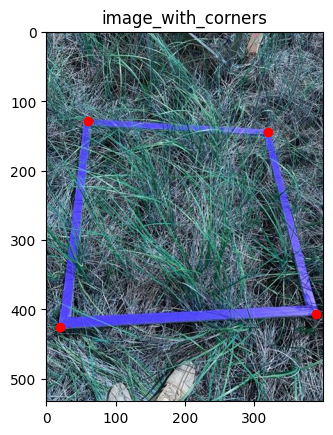

In [19]:
def draw_corners(image, bb): 
    image_with_corners = image.copy()
    #x, y, w, h = bb
    #corners = np.array([[x, y], [x + w, y], [x, y + h], [x + w, y + h]]) 
    corners = np.array(bb)
    for corner in corners:
        plt.plot(corner[0], corner[1], 'ro')  # Draw corners in red

    return image_with_corners
    
    return image_with_corners
image_with_corners = draw_corners(test_quad.copy(), bb) 
plt.imshow(image_with_corners)
plt.title('image_with_corners')
plt.axis('on')  # Hide the axis
plt.show()

In [20]:

def undistort(uncroped_set): 
    for i in uncroped_set: 
        image = uncroped_set.iloc[i] 
        get_bounding_boxes(image, text_prompt="inside of red square", box_threshold=0.5, text_threshold=0.5)
        mask = predictor.predict(point_coords=None, point_labels=None, box=bb) 
        image_contour = cv.findContours(mask, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)  
        corner_pts = cv.minAreaRect(image_contour) 
        objctpoints = cv.boxPoints(corner_pts) 
        h, w =image.shape[:2]
        ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None) 
        newmat, roi = cv.cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))  
        dst = cv.undistort(image, mtx, dist, None, newmat)   
        # undistort
        dst = cv.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
        x, y, w, h = roi
        new_img = dst[y:y+h, x:x+w]
    return First_Crop_Set
def Quad_crop(image, bb):
    x_coords = [point[0] for point in bb]
    y_coords = [point[1] for point in bb]
    x_0, x_1 = min(x_coords), max(x_coords)
    y_0, y_1 = min(y_coords), max(y_coords)
    width = x_1-x_0 
    height = y_1-y_0
    target = [(0,0),(width,0),(width,height),(0,height)] 
    target = np.array(target, dtype=np.float32) 
    bb= np.array(bb, dtype=np.float32)
    mat= cv.getPerspectiveTransform(bb, target)
    cropped_img= cv.warpPerspective(image, mat, (width, height), flags=cv.INTER_CUBIC)

    
    
   

    #croped_img = holder_img[y:y+h, x:x+w]
    return cropped_img
    
    
    
        


(296, 369, 3)


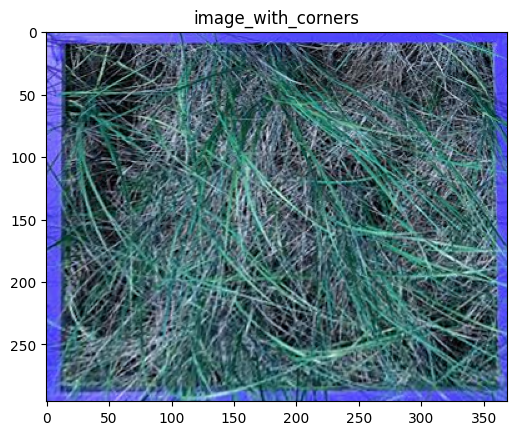

In [21]:


image = cv.cvtColor(test_quad , cv.COLOR_BGR2RGB)
cropped_img = Quad_crop(image, bb) 
cropped_img = cv.cvtColor(cropped_img , cv.COLOR_BGR2RGB) 
print(cropped_img.shape) 
plt.imshow(cropped_img)
plt.title('image_with_corners')
plt.axis('on')  # Hide the axis
plt.show()

In [60]:
def bb_pipeline(image, text_prompt, box_threshold, text_threshold): 
    bb = get_bounding_boxes(image, text_prompt, box_threshold, text_threshold) 
    predictor.set_image(image)
    point_labels, point_coords = get_point_coords(image) 
    masks, scores, _ = predictor.predict(point_coords=point_coords,point_labels=point_labels,box=bb)  
    bb = best_bb(masks, scores, image)  
    return bb

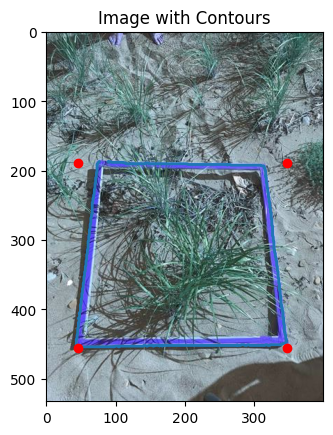

In [33]:

def draw_contours(image, contours, bb):
    image_with_contours = image.copy()
    
    # Draw each contour
    for contour in contours:
        contour = contour.reshape(-1, 2)  # Reshape for plotting
        plt.plot(contour[:, 0], contour[:, 1], linewidth=2)  # Draw contours 
    x, y, w, h = bb 
    if contours
    corners = np.array([[x, y], [x + w, y], [x, y + h], [x + w, y + h]])
    for corner in corners:
        plt.plot(corner[0], corner[1], 'ro')  # Draw corners in red

    return image_with_contours
    
    return image_with_contours 
image_with_contours= draw_contours(test_quad.copy(), contours, bb) 
plt.imshow(image_with_contours)
plt.title('Image with Contours')
plt.axis('on')  # Hide the axis
plt.show()

In [1]:
if masks is not None and len(masks) > 0:
    mask = masks[2]  # Take the first mask

    # Create a figure and display the image and mask
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.imshow(mask, alpha=0.5)
    plt.axis('on')
    plt.show()
else:
    print("No masks were predicted.") 
plt.figure(figsize=(10, 10))
plt.imshow(cropped_img)
plt.axis('off')
plt.show()

NameError: name 'masks' is not defined

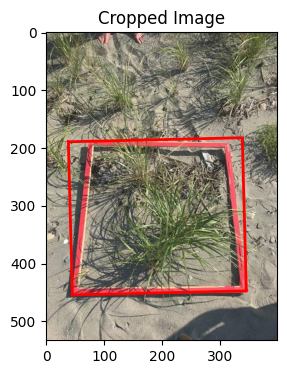

In [27]:
# first priority is loading up to see where the points are
import matplotlib.pyplot as plt
bb_new = bb.copy()
height, width, _ = test_quad.shape 
dpi= 100 
#bb_outline = np.array(bb)
bb_outline = bb_new.astype(np.int32)
x = bb_outline[:, 0]
y = bb_outline[:, 1]
def show_image(image, title):
    plt.figure(figsize=(height/dpi, width/dpi))
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.plot(x, y, 'g-', linewidth=2) 
    plt.plot([x[-1], x[0]], [y[-1], y[0]], 'g-', linewidth=2)
    plt.title(title)
    plt.axis('on')
    plt.show()

# Display the cropped image using matplotlib
show_image(test_quad, title='Cropped Image')

In [ ]:
resnet_weights_path = "C:\\Users\\mcdow\\Downloads\\resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5"
#def make_base_model(input_shape): 
base_model = Sequential()

base_model.add(ResNet50(include_top = False, pooling = "avg", weights = "imagenet")) 
base_model.add(Dense(5, activation = "relu"))
base_model.layers[0].trainable = False 
base_model.summary()

base_model.compile(optimizer = tf.keras.optimizers.Adam(0.01), loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ["accuracy"])


    

In [ ]:
#data augmentation  
# more comprhensive + different techniques to get betr data agumentaton 
# use before reataching to data 
# look at what x was used for origonaly 

#first way need to update so it can take after I section it off
x = 1500 # Should be like 3 to 5 times amount of trianing images
aug = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range= 360, horizontal_flip=True,
    vertical_flip=True ) 
def aug_quad_data(quad_img, x, org_data):
    aug_iter = aug.flow(quad_img) 
    aug_quads = (next(aug_iter)[0].astype(np.uint8) for i in range(x))  
    aug_data = org_data.append(org_data) 
    return final_quad
class AugQuadDataLayer(tf.keras.layers.Layer):
    def __init__(self, x, aug, org_data, **kwargs):
        super(AugQuadDataLayer, self).__init__(**kwargs)
        self.x = x
        self.aug = aug
        self.org_data = org_data
    def call(self, inputs):
        quad_img = inputs
        aug_iter = self.aug.flow(quad_img)
        aug_quads = [next(aug_iter)[0].astype(np.uint8) for _ in range(self.x)]
        aug_data = np.concatenate([self.org_data for i in range(self.x)], axis=0)
        return aug_quads, aug_data 
aug_quad_layer = AugQuadDataLayer(x, aug, org_data)

#second way may be a lot easier than the first way 
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
) 
datagen.fit(train_images)

In [3]:
# apply second after it is origonaly imported
def map_categories_to_integers(category):
    category_map = {'0%': 0, '1-25%': 1, '26-50%': 2, '51-75': 3, "76-100%":4}
    return category_map[category]

def map_quad_cat(uncropped_quad, col): 
    df[col] = df[col].apply(map_categories_to_integers)
    return uncropped_quad

In [1]:
# may need to add somthing to convert them into tensors
uncropped_quad = read_csv_path("dataframe to use")  
uncropped_quad = map_quad_cat(uncropped_quad , num_of_the_column_that_it_tracks_with) # needs to know what column it tracks with
First_Crop_Set, org_data = split_df(uncropped_quad, data_lines, images_lines): # needs specification about lines its spliting it at i.e a number  
paired_set = preprocesing(First_Crop_Set, org_data) # rejoin is in it so need to make sure that it is run first
paired_set.to_pickle("name of file destiention")


NameError: name 'read_csv_path' is not defined

In [ ]:
# run as part of the  base one with tensorflow
import pandas as pd
pd.read_pickle("name of file destiention")

In [ ]:
from sklearn.model_selection import train_test_split

train_images, remaining_images, train_labels, remaining_labels = train_test_split(
    paired_set["Number to index for images"], paired_set["Number to index for % coverage"], train_size=0.8, random_state=42, stratify=paired_set["Number to index for % coverage"]) 
val_images, test_images, val_labels, test_labels = train_test_split(
    remaining_images, remaining_labels, test_size=0.5, random_state=42, stratify=remaining_labels)

In [ ]:
#  pickle on CSCR_1 enviorment and then unpickle on normal envoirment

The pipeline

The Final thing... dun dun dawwww!

In [ ]:
# needs to be in python and not CSCR model b/c uses tensorflow
the_one_and_only_CNN =tf.keras.Sequential(actual_Stand_images, aug_quad_data, base_model, tf.layers.dense(5)) 
the_one_and_only_CNN.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.5, name='accuracy')]) 
the_one_and_only_CNN.fit(paired_set, epochs=10, validation_data=val_dataset)

In [ ]:
#DuneGrass_CSV_path = ""
#read_csv_path(DuneGrass_CSV_path) none to read yet so left as annotation  
# uncroped_quad = split_df(uncroped_quad, data, images) need to figure out for this one the ordering of images and the text and which ones are coming first and second
# First_Crop_Set = undistort(noncroped_set) 
#paired_set = Preprocessing(First_Crop_Set, org_data) 
#convert paired set into tensors